In [1]:
import numpy as np
import matplotlib.pyplot as plt 

from py_wake.deficit_models.gaussian import IEA37SimpleBastankhahGaussian 
from py_wake.examples.data.iea37 import IEA37_WindTurbines , IEA37Site
from topfarm.cost_models.py_wake_wrapper import PyWakeAEPCostModelComponent
from topfarm import TopFarmProblem
from topfarm.easy_drivers import EasyScipyOptimizeDriver
from topfarm.examples.iea37 import get_iea37_initial , get_iea37_constraints , get_iea37_cost
from topfarm.plotting import NoPlot , XYPlotComp
from py_wake.examples.data.hornsrev1 import V80
from py_wake.examples.data.dtu10mw import DTU10MW
from py_wake.examples.data.hornsrev1 import Hornsrev1Site
from py_wake.wind_turbines import WindTurbine, WindTurbines

In [2]:
iea37 = IEA37_WindTurbines() #3.35MW 
v80 = V80() #V80
dtu10mw = DTU10MW() #DTU10MW

In [3]:
#wind turbines specs
wts = WindTurbines.from_WindTurbine_lst([v80,iea37,dtu10mw])
types = wts.types()
print ("Name:\t\t%s" % "\t".join(wts.name(types)))
print('Diameter[m]\t%s' % "\t".join(map(str,wts.diameter(type=types))))
print('Hubheigt[m]\t%s' % "\t".join(map(str,wts.hub_height(type=types))))

Name:		V80	3.35MW	DTU10MW
Diameter[m]	80.0	130.0	178.3
Hubheigt[m]	70.0	110.0	119.0


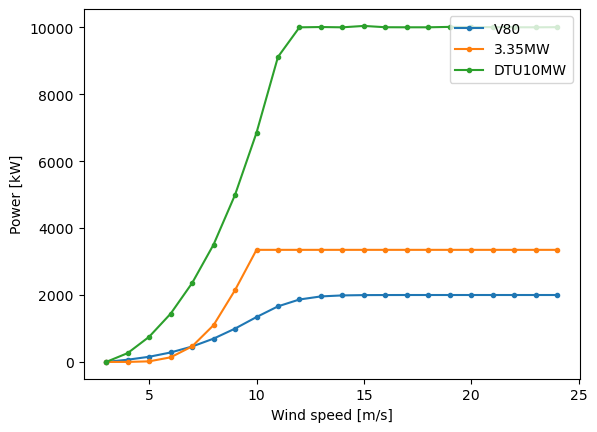

In [4]:
#plot power curves
ws = np.arange(3,25)
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Power [kW]')

for t in types:
    plt.plot(ws, wts.power(ws, type=t)*1e-3,'.-', label=wts.name(t))
plt.legend(loc=1)
plt.show()

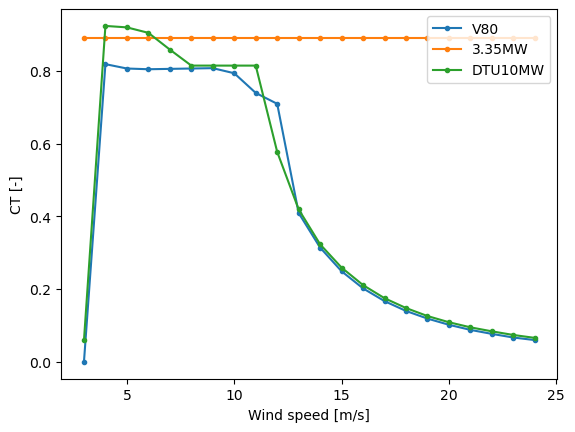

In [5]:
#Plot CT curves
plt.xlabel('Wind speed [m/s]')
plt.ylabel('CT [-]')

for t in types:
    plt.plot(ws, wts.ct(ws, type=t),'.-', label=wts.name(t))
plt.legend(loc=1)
plt.show()